# C1 W4: Using Real-world Images

## Lab 1. Experiment with the horse or human classifier: Training with ImageDataGenerator

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-09-23 14:21:40--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.167.207, 172.253.62.207, 172.253.115.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.167.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   223MB/s    in 0.6s    

2023-09-23 14:21:41 (223 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
#ekstrak ya
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [ ]:
training_horse_dir = "./horse-or-human/horses"
training_human_dir = "./horse-or-human/humans"

In [ ]:
import os

print("Total of horse images: ", len(os.listdir(training_horse_dir)))
print("Total of human images: ", len(os.listdir(training_human_dir)))

Total of horse images:  500
Total of human images:  527


In [ ]:
train_horse_names = os.listdir(training_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(training_human_dir)
print(train_human_names[:10])

['horse02-7.png', 'horse29-8.png', 'horse18-7.png', 'horse31-4.png', 'horse15-2.png', 'horse35-9.png', 'horse09-2.png', 'horse43-1.png', 'horse11-0.png', 'horse44-4.png']
['human03-03.png', 'human06-23.png', 'human10-26.png', 'human14-29.png', 'human08-04.png', 'human11-23.png', 'human04-26.png', 'human02-24.png', 'human08-09.png', 'human03-28.png']


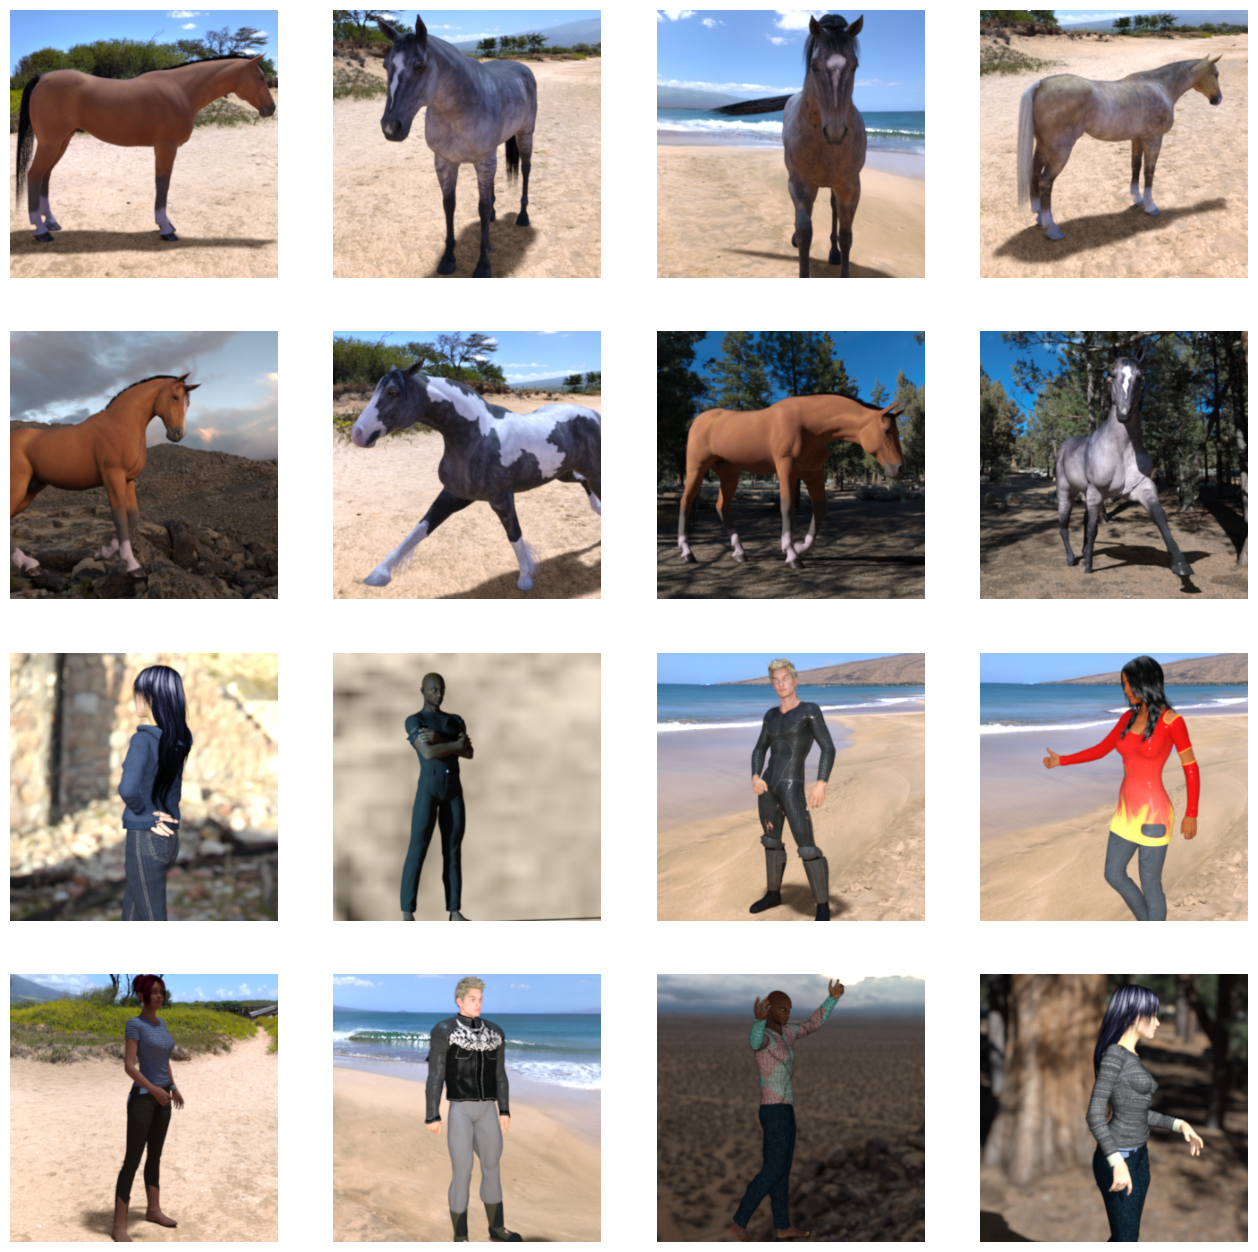

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(training_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(training_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Build model

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [ ]:
model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
model.fit(train_generator, steps_per_epoch=8, epochs=15, verbose=1)

Epoch 1/15
8/8 [==============================] - 85s 10s/step - loss: 0.6905 - accuracy: 0.5039
Epoch 2/15
8/8 [==============================] - 77s 9s/step - loss: 0.8422 - accuracy: 0.6908
Epoch 3/15
8/8 [==============================] - 94s 12s/step - loss: 0.6019 - accuracy: 0.7578
Epoch 4/15
8/8 [==============================] - 77s 9s/step - loss: 0.4120 - accuracy: 0.8187
Epoch 5/15
8/8 [==============================] - 84s 10s/step - loss: 0.5654 - accuracy: 0.7931
Epoch 6/15
8/8 [==============================] - 76s 9s/step - loss: 0.3523 - accuracy: 0.8576
Epoch 7/15
8/8 [==============================] - 85s 10s/step - loss: 0.2580 - accuracy: 0.8936
Epoch 8/15
8/8 [==============================] - 79s 9s/step - loss: 0.9327 - accuracy: 0.8354
Epoch 9/15
8/8 [==============================] - 86s 10s/step - loss: 0.2758 - accuracy: 0.8936
Epoch 10/15
8/8 [==============================] - 83s 12s/step - loss: 0.1632 - accuracy: 0.9399
Epoch 11/15
8/8 [================

## Lab 2. Experiment with the horse or human classifier: ImageDataGenerator with a Validation Set

In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-09-24 18:56:26--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M   232MB/s    in 0.6s    

2023-09-24 18:56:27 (232 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]



In [ ]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-09-24 18:56:27--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip.1’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2023-09-24 18:56:27 (95.9 MB/s) - ‘validation-horse-or-human.zip.1’ saved [11480187/11480187]



In [ ]:
import zipfile
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [ ]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse02-7.png', 'horse29-8.png', 'horse18-7.png', 'horse31-4.png', 'horse15-2.png', 'horse35-9.png', 'horse09-2.png', 'horse43-1.png', 'horse11-0.png', 'horse44-4.png']
TRAIN SET HUMANS: ['human03-03.png', 'human06-23.png', 'human10-26.png', 'human14-29.png', 'human08-04.png', 'human11-23.png', 'human04-26.png', 'human02-24.png', 'human08-09.png', 'human03-28.png']
VAL SET HORSES: ['horse4-000.png', 'horse4-530.png', 'horse2-441.png', 'horse5-076.png', 'horse5-002.png', 'horse5-303.png', 'horse6-089.png', 'horse5-550.png', 'horse5-083.png', 'horse5-164.png']
VAL SET HUMANS: ['valhuman02-05.png', 'valhuman04-16.png', 'valhuman05-06.png', 'valhuman02-06.png', 'valhuman05-22.png', 'valhuman03-10.png', 'valhuman01-15.png', 'valhuman04-24.png', 'valhuman02-08.png', 'valhuman04-12.png']


In [ ]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             ])

In [ ]:
model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    './validation-horse-or-human',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
model.fit(train_generator,
          epochs=15,
          steps_per_epoch=8,
          validation_data=validation_generator,
          validation_steps=8)

Epoch 1/15
8/8 [==============================] - 91s 13s/step - loss: 0.6833 - accuracy: 0.6385 - val_loss: 0.5929 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 88s 13s/step - loss: 1.4418 - accuracy: 0.7697 - val_loss: 0.3991 - val_accuracy: 0.8672
Epoch 3/15
8/8 [==============================] - 90s 11s/step - loss: 0.7883 - accuracy: 0.8187 - val_loss: 0.4110 - val_accuracy: 0.8438
Epoch 4/15
8/8 [==============================] - 86s 11s/step - loss: 0.3233 - accuracy: 0.9210 - val_loss: 0.5163 - val_accuracy: 0.8711
Epoch 5/15
8/8 [==============================] - 91s 11s/step - loss: 0.1680 - accuracy: 0.9333 - val_loss: 0.9176 - val_accuracy: 0.8516
Epoch 6/15
8/8 [==============================] - 87s 11s/step - loss: 0.2139 - accuracy: 0.9121 - val_loss: 1.0184 - val_accuracy: 0.8516
Epoch 7/15
8/8 [==============================] - 84s 10s/step - loss: 0.1614 - accuracy: 0.9366 - val_loss: 1.4615 - val_accuracy: 0.8164
Epoch 8/15
8/8 [===========

# Lab 3: Effect of Compacted Images in Training

In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-09-27 22:42:41--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.207, 172.253.115.207, 172.253.122.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   217MB/s    in 0.7s    

2023-09-27 22:42:42 (217 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-09-27 22:42:42--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.207, 172.253.115.207, 172.253.122.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2023-09-27 22:42:42 (106 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [ ]:
import os

training_human_dir = os.path.join('./horse-or-human/humans')
training_horse_dir = os.path.join('./horse-or-human/horses')
validation_human_dir = os.path.join('./validation-horse-or-human/humans')
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

In [ ]:
train_human_names = os.listdir(training_human_dir)
print(f'Train human names: {train_human_names[:10]}')
train_horse_names = os.listdir(training_horse_dir)
print(f'Train horse names: {train_horse_names[:10]}')
val_human_names = os.listdir(validation_human_dir)
print(f'Val human names: {val_human_names[:10]}')
val_horse_names = os.listdir(validation_horse_dir)
print(f'Val horse names: {val_horse_names[:10]}')

Train human names: ['human01-12.png', 'human15-15.png', 'human07-19.png', 'human02-08.png', 'human01-13.png', 'human13-17.png', 'human01-25.png', 'human06-27.png', 'human06-17.png', 'human12-22.png']
Train horse names: ['horse15-7.png', 'horse14-1.png', 'horse22-2.png', 'horse27-4.png', 'horse37-7.png', 'horse17-1.png', 'horse50-1.png', 'horse03-9.png', 'horse50-6.png', 'horse07-3.png']
Val human names: ['valhuman04-06.png', 'valhuman05-14.png', 'valhuman03-20.png', 'valhuman02-01.png', 'valhuman03-09.png', 'valhuman02-12.png', 'valhuman01-15.png', 'valhuman05-07.png', 'valhuman03-17.png', 'valhuman04-19.png']
Val horse names: ['horse6-064.png', 'horse1-484.png', 'horse4-599.png', 'horse6-198.png', 'horse5-259.png', 'horse1-510.png', 'horse4-159.png', 'horse5-018.png', 'horse1-335.png', 'horse4-389.png']


In [ ]:
print(f'Total training human images: {len(os.listdir(training_human_dir))}')
print(f'Total training horse images: {len(os.listdir(training_horse_dir))}')
print(f'Total validation human images: {len(os.listdir(validation_human_dir))}')
print(f'Total validation horse images: {len(os.listdir(validation_horse_dir))}')

Total training human images: 527
Total training horse images: 500
Total validation human images: 128
Total validation horse images: 128


In [ ]:
# create model compacted version
# use less layer because the smalle input

import tensorflow as tf

model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             ])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(150,150),
    batch_size=128,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    './validation-horse-or-human',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    steps_per_epoch=8,
    validation_data=validation_generator,
    validation_steps=8,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 31s 3s/step - loss: 1.0256 - accuracy: 0.5473 - val_loss: 0.6612 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 29s 3s/step - loss: 0.7222 - accuracy: 0.6719 - val_loss: 0.5154 - val_accuracy: 0.7383
Epoch 3/15
8/8 [==============================] - 29s 3s/step - loss: 0.6690 - accuracy: 0.7508 - val_loss: 0.3324 - val_accuracy: 0.8750
Epoch 4/15
8/8 [==============================] - 30s 3s/step - loss: 0.3422 - accuracy: 0.8687 - val_loss: 1.0538 - val_accuracy: 0.7656
Epoch 5/15
8/8 [==============================] - 30s 4s/step - loss: 0.3049 - accuracy: 0.8854 - val_loss: 0.7649 - val_accuracy: 0.7969
Epoch 6/15
8/8 [==============================] - 28s 3s/step - loss: 0.2406 - accuracy: 0.9032 - val_loss: 0.4123 - val_accuracy: 0.8789
Epoch 7/15
8/8 [==============================] - 27s 3s/step - loss: 0.1916 - accuracy: 0.9344 - val_loss: 0.9529 - val_accuracy: 0.8320
Epoch 8/15
8/8 [==================

# Assignment Week 4

In [6]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
base_dir = './assignment/data/'
happy_dir = os.path.join(base_dir, 'happy')
sad_dir = os.path.join(base_dir, 'sad')

In [11]:
print(f'Total happy images: {len(os.listdir(happy_dir))}')
print(f'Total sad images: {len(os.listdir(sad_dir))}')

Total happy images: 40
Total sad images: 40


Happy image: 


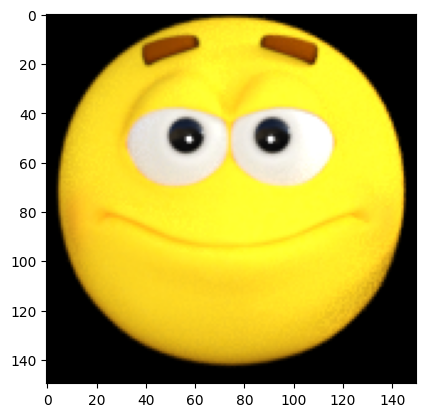

Sad image: 


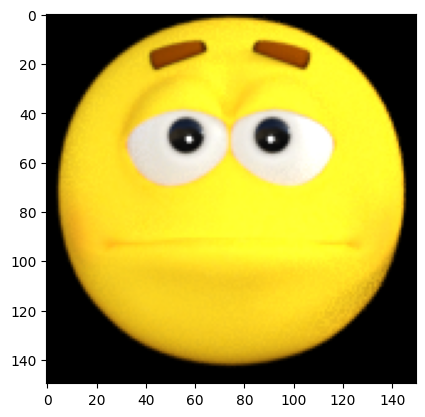

In [3]:
#lihat data

from tensorflow.keras.preprocessing.image import load_img

print('Happy image: ')
plt.imshow(load_img(f'{os.path.join(happy_dir, os.listdir(happy_dir)[0])}'))
plt.show()

print('Sad image: ')
plt.imshow(load_img(f'{os.path.join(sad_dir, os.listdir(sad_dir)[0])}'))
plt.show()

In [7]:
# lihat karakteristik data: shape & nilai maks. rgb

from tensorflow.keras.preprocessing.image import img_to_array

image = img_to_array(load_img(f'{os.path.join(happy_dir, os.listdir(happy_dir)[0])}'))

print(f'The shape of image {image.shape}')

print(f'Maximum value of image {np.max(image)}')

The shape of image (150, 150, 3)
Maximum value of image 255.0


In [12]:
# buat generator data di direktori lokal
#batch_size biasanya per 4 batch jadi 40 per 4 = 10

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=10,
    class_mode='binary'
)

Found 80 images belonging to 2 classes.


In [23]:
# karna data gambar kecil jadi model layer cukup 3

model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')])

In [24]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if(logs.get('accuracy') is not None and logs.get('accuracy') > 0.999):
            print('\n reached accuracy 99%, stop training')
            self.model.stop_training = True
            
callback = MyCallback()

In [25]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [26]:
history = model.fit(train_generator,
                     epochs=15,
                     callbacks=[callback])

Epoch 1/15
8/8 [==============================] - 2s 110ms/step - loss: 0.9336 - accuracy: 0.6125
Epoch 2/15
8/8 [==============================] - 1s 91ms/step - loss: 0.4890 - accuracy: 0.8250
Epoch 3/15
8/8 [==============================] - 1s 85ms/step - loss: 0.2850 - accuracy: 0.9000
Epoch 4/15
8/8 [==============================] - 1s 88ms/step - loss: 0.1547 - accuracy: 0.9375
Epoch 5/15
8/8 [==============================] - 1s 86ms/step - loss: 0.1031 - accuracy: 0.9375
Epoch 6/15
8/8 [==============================] - 1s 86ms/step - loss: 0.0677 - accuracy: 0.9750
Epoch 7/15
8/8 [==============================] - 1s 84ms/step - loss: 0.0472 - accuracy: 0.9875
Epoch 8/15
8/8 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 1.0000
 reached accuracy 99%, stop training
8/8 [==============================] - 1s 84ms/step - loss: 0.0233 - accuracy: 1.0000


In [28]:
print(f'Model reached accuracy after {len(history.epoch)} epochs')

Model reached accuracy after 8 epochs
